from https://github.com/SeongBeomLEE/Tobigs_Recommendation_System_Seminar/blob/main/Week2_Recommendation_Seminar_Code.ipynb

# 데이터 준비

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/movie_ratings_small.csv

--2022-01-24 23:40:50--  https://github.com/dhrim/deep_learning_data/raw/master/movie_ratings_small.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movie_ratings_small.csv [following]
--2022-01-24 23:40:51--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movie_ratings_small.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2438266 (2.3M) [text/plain]
Saving to: ‘movie_ratings_small.csv.2’

movie_ratings_small 100%[===================>]   2.33M  --.-KB/s    in 0.02s   

2022-01-24 23:40:51 (102 MB/s) - ‘movie_ratings_small.csv.2’ saved [24

In [ ]:
!wget https://github.com/dhrim/deep_learning_data/raw/master/movies_metadata.csv

--2022-01-24 23:40:51--  https://github.com/dhrim/deep_learning_data/raw/master/movies_metadata.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movies_metadata.csv [following]
--2022-01-24 23:40:52--  https://raw.githubusercontent.com/dhrim/deep_learning_data/master/movies_metadata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34445126 (33M) [text/plain]
Saving to: ‘movies_metadata.csv.2’

movies_metadata.csv 100%[===================>]  32.85M  --.-KB/s    in 0.09s   

2022-01-24 23:40:53 (361 MB/s) - ‘movies_metadata.csv.2’ saved [34445126/34445126]



# 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

## rating

In [ ]:
rating = pd.read_csv("movie_ratings_small.csv")
rating

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


## meta

In [ ]:
meta = pd.read_csv('movies_metadata.csv')
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,Fa

In [ ]:
# meta.id가 이상한 row들이 있다. 삭제하자. imdb=='0'으로 찾아낼 수 있다.
print(len(meta))
display(meta[meta.imdb_id=='0'])
meta = meta[meta.imdb_id!='0']
print(len(meta))

45466


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


45463


In [ ]:
meta = meta[:10000]
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,43379,tt0043809,it,Miracolo a Milano,Once upon a time an old woman discovers a baby...,1.60725,/jHBpHi5hoNEdYl3TzOwFdHogrCo.jpg,"[{'name': 'Produzioni De Sica', 'id': 1875}, {...","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1951-02-08,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"An impudent, riotous laugh on the lives and mo...",Miracle in Milan,False,7.0,26.0
9996,False,NaN,4500000,"[{'id': 18, 'name': 'Drama'}]",NaN,9393,tt0384369,de,Napola – Elite für den Führer,"In 1942, Friedrich Weimer's boxing skills get ...",5.69684,/vUTORsahJMryb05goADzLPjCchF.jpg,"[{'name': 'Constantin Film', 'id': 47}, {'name...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2004-07-04,3764219.0,117.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,Men make history. We make the men.,Before the Fall,False,7.3,74.0
9997,False,NaN,9200000,"[{'id': 37, 'name': 'Western'}, {'id': 35, 'na...",NaN,16972,tt0079180,en,The Frisco Kid,Rabbi Avram arrives in Philadelphia from Polan...,7.08521,/oWCCqyCwMJX7H85i3CJqShRaNky.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...

## merged

2개의 dataframe을 합치기

In [ ]:
meta = meta.rename(columns={'id':'movieId'})
meta['movieId'] = meta['movieId'].astype(int)

merged = pd.merge(rating, meta[['movieId', 'original_title']], how='left', on='movieId')
merged

,userId,movieId,rating,timestamp,original_title
0,1,31,2.5,1260759144,NaN
1,1,1029,3.0,1260759179,NaN
2,1,1061,3.0,1260759182,NaN
3,1,1129,2.0,1260759185,NaN
4,1,1172,4.0,1260759205,NaN
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,NaN
100000,671,6269,4.0,1065149201,NaN
100001,671,6365,4.0,1070940363,NaN
100002,671,6385,2.5,1070979663,NaN


original_title이 비어있는 row 삭제

In [ ]:
print(len(merged))
merged = merged[merged['original_title'].notnull()].reset_index(drop=True)
print(len(merged))
merged

100004
30162


,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back
...,...,...,...,...,...
30157,671,4973,4.5,1064245471,Sous le Sable
30158,671,4993,5.0,1064245483,5 Card Stud
30159,671,4995,4.0,1064891537,Boogie Nights
30160,671,5902,3.5,1064245507,A Bridge Too Far


## id2title, title2id, index2title, title2index

In [ ]:
id2title = {}
title2id = {}
index2title = {}
title2index = {}
    
for index, row in meta.iterrows():
    id2title[row['movieId']] = row['original_title']
    title2id[row['original_title']] = row['movieId']
    index2title[index] = row['original_title']
    title2index[row['original_title']] = index

## user_movie_matrix

In [ ]:
user_movie_matrix = merged.pivot_table(index='userId', columns = 'movieId', values = 'rating')

In [ ]:
user_movie_matrix

movieId,2,5,6,11,12,13,14,15,16,18,19,20,21,22,24,26,28,38,55,62,63,64,65,66,68,70,71,73,76,77,78,79,80,81,83,85,87,88,89,93,...,49225,49299,49314,49688,51044,51927,52666,52717,53000,55207,55687,56156,56715,58904,59143,59387,60760,61401,62383,62394,62956,64900,68347,69069,69526,70282,72308,74948,78041,79008,80350,81949,84116,95963,98491,103299,105763,108548,120637,134368
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix.fillna(0, inplace=True)

In [ ]:
user_movie_matrix

movieId,2,5,6,11,12,13,14,15,16,18,19,20,21,22,24,26,28,38,55,62,63,64,65,66,68,70,71,73,76,77,78,79,80,81,83,85,87,88,89,93,...,49225,49299,49314,49688,51044,51927,52666,52717,53000,55207,55687,56156,56715,58904,59143,59387,60760,61401,62383,62394,62956,64900,68347,69069,69526,70282,72308,74948,78041,79008,80350,81949,84116,95963,98491,103299,105763,108548,120637,134368
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## movie_user_matrix

In [ ]:
movie_user_matrix = merged.pivot_table(index='movieId', columns = 'userId', values = 'rating')

In [ ]:
movie_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.5,4.0,3.0,NaN,NaN,NaN,3.5,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,5.0,4.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_user_matrix.fillna(0, inplace=True)

In [ ]:
movie_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.5,4.0,3.0,0.0,0.0,0.0,3.5,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,4.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Rule-based Model


## A Priori 알고리즘

from https://www.kaggle.com/ankits29/movie-recommendation-with-ml-apriori-explained

각 유저가 본 영화들의 리스트를 기반으로 특정 영화에 대한 다른 영화의 확률적 수치로 구한다.

예) 귀저기 -> 맥주

입력 : 영화 이름

출력 : 추천하는 영화

rating 여부를 1, 0으로 표시

In [ ]:
user_movie_title_matrix = merged.pivot_table(index="userId", columns='original_title')['rating']
user_movie_title_matrix

original_title,10 Things I Hate About You,11'09''01 - September 11,12 Angry Men,15 Minutes,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,21 Grams,24 Hour Party People,25th Hour,28 Days Later,29th Street,3 Ninjas: High Noon at Mega Mountain,36 Fillette,40 Days and 40 Nights,42nd Street,48 Hrs.,5 Card Stud,50 First Dates,54,5x2,8 Mile,8 femmes,8½,A Beautiful Mind,A Bridge Too Far,A Brief History of Time,A Chorus Line,A Christmas Carol,A Christmas Story,A Clockwork Orange,A Close Shave,A Countess from Hong Kong,A Few Good Men,A Hard Day's Night,A Kiss Before Dying,A Nightmare on Elm Street,A Perfect Murder,A Pyromaniac's Love Story,...,เพชฌฆาตเงียบอันตราย,となりのトトロ,はなび,アカルイミライ,アキラ,ゴジラ,ゴジラvsメカゴジラ,ゴジラ・エビラ・モスラ 南海の大決闘,ドールズ,バトル・ロワイアル,ビジターQ,リング,七人の侍,人間の條件 完結篇,人間の條件 第３部望郷篇／第４部戦雲篇,仁義なき戦い,修羅雪姫,千と千尋の神隠し,卧虎藏龙,巴尔扎克与小裁缝,座頭市,愛のコリーダ,暗戰,続宮本武蔵 一乗寺の決闘,纵横四海,羅生門,英雄,菊次郎の夏,蜘蛛巣城,誰も知らない,赤ひげ,野火,隠し砦の三悪人,風の谷のナウシカ,鬼婆,공동경비구역 JSA,봄 여름 가을 겨울 그리고 봄,빈집,올드보이,"장화, 홍련"
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def has_rating(v):
    return int(v>0)
user_movie_title_matrix = user_movie_title_matrix.applymap(has_rating)
user_movie_title_matrix

original_title,10 Things I Hate About You,11'09''01 - September 11,12 Angry Men,15 Minutes,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2010,2046,21 Grams,24 Hour Party People,25th Hour,28 Days Later,29th Street,3 Ninjas: High Noon at Mega Mountain,36 Fillette,40 Days and 40 Nights,42nd Street,48 Hrs.,5 Card Stud,50 First Dates,54,5x2,8 Mile,8 femmes,8½,A Beautiful Mind,A Bridge Too Far,A Brief History of Time,A Chorus Line,A Christmas Carol,A Christmas Story,A Clockwork Orange,A Close Shave,A Countess from Hong Kong,A Few Good Men,A Hard Day's Night,A Kiss Before Dying,A Nightmare on Elm Street,A Perfect Murder,A Pyromaniac's Love Story,...,เพชฌฆาตเงียบอันตราย,となりのトトロ,はなび,アカルイミライ,アキラ,ゴジラ,ゴジラvsメカゴジラ,ゴジラ・エビラ・モスラ 南海の大決闘,ドールズ,バトル・ロワイアル,ビジターQ,リング,七人の侍,人間の條件 完結篇,人間の條件 第３部望郷篇／第４部戦雲篇,仁義なき戦い,修羅雪姫,千と千尋の神隠し,卧虎藏龙,巴尔扎克与小裁缝,座頭市,愛のコリーダ,暗戰,続宮本武蔵 一乗寺の決闘,纵横四海,羅生門,英雄,菊次郎の夏,蜘蛛巣城,誰も知らない,赤ひげ,野火,隠し砦の三悪人,風の谷のナウシカ,鬼婆,공동경비구역 JSA,봄 여름 가을 겨울 그리고 봄,빈집,올드보이,"장화, 홍련"
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


apriori를 사용하여 빈도 구하기

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(user_movie_title_matrix, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.104322,"(20,000 Leagues Under the Sea)"
1,0.129657,(2001: A Space Odyssey)
2,0.298063,(48 Hrs.)
3,0.298063,(5 Card Stud)
4,0.152012,(A Clockwork Orange)
...,...,...
4020,0.107303,"(The Conversation, Terminator 3: Rise of the M..."
4021,0.105812,"(The Hours, Terminator 3: Rise of the Machines..."
4022,0.114754,"(The Hours, Terminator 3: Rise of the Machines..."
4023,0.101341,"(Terminator 3: Rise of the Machines, The Milli..."


빈도를 가지고 A영화를 본사람이 B영화를 본 확률적 수치 lift 구하기

In [ ]:
rules = association_rules(frequent_itemsets , metric="confidence", min_threshold=0.0)
rules[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
0,(48 Hrs.),(5 Card Stud),1.224575
1,(5 Card Stud),(48 Hrs.),1.224575
2,(48 Hrs.),(A Clockwork Orange),2.269559
3,(A Clockwork Orange),(48 Hrs.),2.269559
4,(A Nightmare on Elm Street),(48 Hrs.),1.957083
...,...,...,...
36267,(The Hours),"(Солярис, Terminator 3: Rise of the Machines, ...",2.721460
36268,(Terminator 3: Rise of the Machines),"(Солярис, The Hours, Rain Man, The Million Dol...",1.877695
36269,(Rain Man),"(Солярис, The Hours, Terminator 3: Rise of the...",2.810298
36270,(The Million Dollar Hotel),"(Солярис, The Hours, Terminator 3: Rise of the...",1.833923


lift를 가지고 큰 순서로 소팅

In [ ]:
sorted_rules = rules.sort_values(by=['lift'], ascending=False)
sorted_rules[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
21556,"(Big Fish, Titanic)","(Psycho, Солярис)",5.231369
21557,"(Psycho, Солярис)","(Big Fish, Titanic)",5.231369
21332,"(Big Fish, Monsoon Wedding)","(Psycho, Солярис)",4.954414
21333,"(Psycho, Солярис)","(Big Fish, Monsoon Wedding)",4.954414
15259,"(Rain Man, Titanic)","(Big Fish, A Nightmare on Elm Street)",4.821217
...,...,...,...
1338,(To Kill a Mockingbird),(The 39 Steps),1.113617
87,(5 Card Stud),(Men in Black II),1.108348
86,(Men in Black II),(5 Card Stud),1.108348
391,(The 39 Steps),(Bang Boom Bang - Ein todsicheres Ding),1.106804


특정 영화이름에 대한 것만 추리기

In [ ]:
target_movie = 'Men in Black II'

is_target_movie = sorted_rules['antecedents'].apply(lambda x: len(x)==1 and list(x)[0]==target_movie)
filtered = sorted_rules[is_target_movie]
filtered[['antecedents', 'consequents', 'lift']]

,antecedents,consequents,lift
8180,(Men in Black II),"(Scarface, Terminator 3: Rise of the Machines)",2.344332
24081,(Men in Black II),"(The Talented Mr. Ripley, Sleepless in Seattle...",2.341338
21672,(Men in Black II),"(Dawn of the Dead, Terminator 3: Rise of the M...",2.288724
8288,(Men in Black II),"(The Talented Mr. Ripley, The 39 Steps)",2.288724
8204,(Men in Black II),"(The Talented Mr. Ripley, Sleepless in Seattle)",2.269345
...,...,...,...
874,(Men in Black II),(The Million Dollar Hotel),1.281049
883,(Men in Black II),(To Kill a Mockingbird),1.225446
840,(Men in Black II),(Monsoon Wedding),1.224453
427,(Men in Black II),(Batman Returns),1.213192


lift 순으로 영화제목을 리스트에 담기

In [ ]:
recommentations = []
for movie in filtered['consequents'].values:
    for title in movie:
        if title in recommentations: continue
        recommentations.append(title)

추천 결과

In [ ]:
recommentations[:10]

['Scarface',
 'Terminator 3: Rise of the Machines',
 'The Talented Mr. Ripley',
 'Sleepless in Seattle',
 'Dawn of the Dead',
 'Солярис',
 'The 39 Steps',
 'The Thomas Crown Affair',
 'Point Break',
 'Once Were Warriors']

# Content-based Model

## 장르 벡트 간 거리 사용

각 영화에 대한 장르로 구성된 벡터를 기반으로, 각 거리로 비슷한 영화를 찾는다.

입력 : 영화 이름

출력 : 장르가 비슷한 영화


In [ ]:
def get_genres(x):
  result = []
  x = eval(x)
  for i in x:
    result.append(i['name'])
  return result

meta['clean_genres'] = meta['genres'].apply(get_genres)
meta[['movieId', 'original_title', 'genres', 'clean_genres']]

,movieId,original_title,genres,clean_genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
...,...,...,...,...
9995,43379,Miracolo a Milano,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...","[Drama, Fantasy, Comedy]"
9996,9393,Napola – Elite für den Führer,"[{'id': 18, 'name': 'Drama'}]",[Drama]
9997,16972,The Frisco Kid,"[{'id': 37, 'name': 'Western'}, {'id': 35, 'na...","[Western, Comedy]"
9998,21325,Onmyoji,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...","[Drama, Fantasy, Horror]"


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

clearn_genres_values = meta['clean_genres'].values
transaction_encoder = TransactionEncoder()
movie_n_genre = transaction_encoder.fit(clearn_genres_values).transform(clearn_genres_values)
print(movie_n_genre.shape)
movie_n_genre

(10000, 20)


array([[False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False]])

In [ ]:
movie_genre_matrix = pd.DataFrame(movie_n_genre, columns=transaction_encoder.columns_)
movie_genre_matrix = movie_genre_matrix.astype(np.int16)
movie_genre_matrix.index = meta.movieId
movie_genre_matrix.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
862,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8844,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
15602,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31357,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11862,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(movie_genre_matrix.shape)

(10000, 20)


In [ ]:
movie_genre_matrix[:10]

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
862,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8844,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
15602,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31357,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11862,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
949,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
11860,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
45325,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9091,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
title2index['Men in Black II']

5325

In [ ]:
def get_similar_movies(distance_matrix, target_movie, topn=10, reverse=True):
    movie_index = title2index[target_movie]
    similar_scores = [(i, s) for i, s in enumerate(distance_matrix[movie_index]) if i!=movie_index]
    sorted_similar_scores = sorted(similar_scores, key = lambda x: x[1], reverse=reverse)
    similar_movies = [(id2title[movie_genre_matrix.index[i]], s) for i, s in sorted_similar_scores]
    similar_movies = similar_movies[:topn]
    return similar_movies

### 내적

In [ ]:
dot_scores = np.dot(movie_genre_matrix.values, movie_genre_matrix.values.T)

In [ ]:
get_similar_movies(dot_scores, 'Men in Black II', reverse=True)

[('Men in Black', 4),
 ('Small Soldiers', 4),
 ('Superman III', 4),
 ('Wild Wild West', 4),
 ('Mystery Men', 4),
 ('Teenage Mutant Ninja Turtles', 4),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze', 4),
 ('Teenage Mutant Ninja Turtles III', 4),
 ('Sheena', 4),
 ('Jimmy Neutron: Boy Genius', 4)]

### 피어슨 유사도

In [ ]:
pearson_scores = movie_genre_matrix.T.corr().values

In [ ]:
get_similar_movies(pearson_scores, 'Men in Black II', reverse=True)

[('The Garbage Pail Kids Movie', 0.8401680504168058),
 ('Total Recall', 0.8401680504168058),
 ('X-Men', 0.8401680504168058),
 ('The Time Machine', 0.8401680504168058),
 ('Star Wars: Episode II - Attack of the Clones', 0.8401680504168058),
 ('Rollerball', 0.8401680504168058),
 ('The Adventures of Pluto Nash', 0.8401680504168058),
 ('Megaforce', 0.8401680504168058),
 ('Death Race 2000', 0.8401680504168058),
 ('The Stepford Wives', 0.8401680504168058)]

### 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_scores = cosine_similarity(movie_genre_matrix, movie_genre_matrix)

In [ ]:
get_similar_movies(cosine_scores, 'Men in Black II', reverse=True)

[('Men in Black', 1.0),
 ('Double Dragon', 1.0),
 ('Small Soldiers', 0.8944271909999159),
 ('Superman III', 0.8944271909999159),
 ('Wild Wild West', 0.8944271909999159),
 ('Mystery Men', 0.8944271909999159),
 ('Teenage Mutant Ninja Turtles', 0.8944271909999159),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze',
  0.8944271909999159),
 ('Sheena', 0.8944271909999159),
 ('Spy Kids 3-D: Game Over', 0.8944271909999159)]

### 유크릴드 거리

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_scores = euclidean_distances(movie_genre_matrix, movie_genre_matrix)

In [ ]:
get_similar_movies(euclidean_scores, 'Men in Black II', reverse=False)

[('Men in Black', 0.0),
 ('Double Dragon', 0.0),
 ('Star Wars', 1.0),
 ('Stargate', 1.0),
 ('The Three Musketeers', 1.0),
 ('Independence Day', 1.0),
 ('The Empire Strikes Back', 1.0),
 ('Return of the Jedi', 1.0),
 ('Forbidden Planet', 1.0),
 ('The Lost World: Jurassic Park', 1.0)]

### 자카르도 거리

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_scores = pairwise_distances(movie_genre_matrix.values, metric='jaccard')

In [ ]:
get_similar_movies(pairwise_scores, 'Men in Black II', reverse=False)

[('Men in Black', 0.0),
 ('Double Dragon', 0.0),
 ('Small Soldiers', 0.2),
 ('Superman III', 0.2),
 ('Wild Wild West', 0.2),
 ('Mystery Men', 0.2),
 ('Teenage Mutant Ninja Turtles', 0.2),
 ('Teenage Mutant Ninja Turtles II: The Secret of the Ooze', 0.2),
 ('Sheena', 0.2),
 ('Spy Kids 3-D: Game Over', 0.2)]

## TF-IDF 사용

영화의 개요에 대한 TF-IDF 벡터를 구하고, 이를 기반으로 거리를 구한다.

입력 : 영화 이름

출력 : 개요가 비슷한 영황


In [ ]:
meta = meta[meta['overview'].notnull()].reset_index(drop=True)
print(len(meta))

meta.head()

9971


,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,clean_genres
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,[Comedy]


In [ ]:
meta[['original_title', 'overview']]

,original_title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...
9966,Miracolo a Milano,Once upon a time an old woman discovers a baby...
9967,Napola – Elite für den Führer,"In 1942, Friedrich Weimer's boxing skills get ..."
9968,The Frisco Kid,Rabbi Avram arrives in Philadelphia from Polan...
9969,Onmyoji,"During a dark time in the Heian period, when e..."



```
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

shape = (4, 9)

tfidf_matrix[0] # 첫번째 문서에 대한 각 단어의 tf-idf 점수
  (document_idx, term_idx) tf-idf score
  (0, 1)	0.46979138557992045  # document
  (0, 2)	0.5802858236844359   # first
  (0, 3)	0.38408524091481483  # is
  (0, 6)	0.38408524091481483  # the
  (0, 8)	0.38408524091481483  # this
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

print(X.shape)
print(X[0])


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
(4, 9)
  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(meta['overview'])
tfidf_matrix.shape

(9971, 32350)

In [ ]:
print(tfidf_vectorizer.get_feature_names_out())

['00' '000' '000th' ... 'чёрный' 'たけみかずち' 'ひめ']


### 코사인 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_scores = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
get_similar_movies(cosine_scores, 'Men in Black II')

[('Tarzan the Fearless', 0.2949364584108511),
 ('Rent-a-Kid', 0.20881213251053135),
 ('Terminal Velocity', 0.15874418365063628),
 ('Quick Change', 0.15702270105183505),
 ('Eating Raoul', 0.15156446775096852),
 ('Beyond the Valley of the Dolls', 0.15031492397705407),
 ('The Pacifier', 0.1473975792900093),
 ('Thunderbirds', 0.14021061410838154),
 ('Reach The Rock', 0.13808896313800315),
 ('Men with Brooms', 0.1258917704167393)]

### 유클리드 거리

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_scores = euclidean_distances(tfidf_matrix, tfidf_matrix)

In [ ]:
get_similar_movies(euclidean_scores, 'Men in Black II')

[("L'uomo delle stelle", 1.4142135623730954),
 ('Léon', 1.4142135623730954),
 ('Pao Da Shuang Deng', 1.4142135623730954),
 ('Bullets Over Broadway', 1.4142135623730954),
 ('Higher Learning', 1.4142135623730954),
 ('Blade Runner', 1.4142135623730954),
 ('Spanking the Monkey', 1.4142135623730954),
 ('The Substitute', 1.4142135623730954),
 ('The Arrival', 1.4142135623730954),
 ('A Time to Kill', 1.4142135623730954)]

## Word2Vec

사용자가 영화를 본 순서에 맞춰서 영화를 추천

input = 사용자가 영화를 본 순서 데이터

output = 현재 사용자가 보는 영화를 기준으로 비슷한 순서의 영화를 추천

In [ ]:
user_viewed_movie_names = merged.groupby(['userId'])['original_title'].agg({'unique'}).values
print(user_viewed_movie_names.shape)
print(user_viewed_movie_names[0][0])
print(user_viewed_movie_names[1][0])

(671, 1)
['Rocky III' 'Greed' 'American Pie' 'My Tutor'
 'Jay and Silent Bob Strike Back']
['2001: A Space Odyssey' 'Trois couleurs : Rouge' 'Der Himmel über Berlin'
 '48 Hrs.' 'Lost in Translation' "Ocean's Eleven"
 'Back to the Future Part II' 'Star Trek IV: The Voyage Home'
 'A Clockwork Orange' 'Berlin: Die Sinfonie der Grosstadt' 'Rebecca'
 'Czlowiek z zelaza' 'Stand by Me' 'Pocketful of Miracles'
 'Live and Let Die' 'Cat on a Hot Tin Roof' 'Lili Marleen' 'Le Mépris'
 'Das weisse Rauschen' 'Terminator 3: Rise of the Machines' 'Catwoman'
 'True Romance' 'Night on Earth' 'Batman Returns'
 'A Nightmare on Elm Street' 'La strada' 'Romeo + Juliet'
 'My Own Private Idaho' 'Monsoon Wedding' 'The Green Mile'
 'Reservoir Dogs' 'Love Actually' 'Notting Hill' 'Once Were Warriors'
 'Psycho' 'Fight Club' 'The Poseidon Adventure' 'Pane e Tulipani'
 'Monsters, Inc.' 'Wag the Dog' 'Big Fish' 'The Hours' 'The Conversation'
 'Солярис' 'The Last Samurai' 'Die Ehe der Maria Braun']


In [ ]:
sentence = []
for movie_names_by_a_user in user_viewed_movie_names:
    sentence.append(list(map(str, movie_names_by_a_user[0])))

In [ ]:
print(sentence[0])

['Rocky III', 'Greed', 'American Pie', 'My Tutor', 'Jay and Silent Bob Strike Back']


In [ ]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentence, min_count=1, iter=200)

In [ ]:
print(len(merged['original_title'].unique()))
print(len(word2vec_model.wv.vocab))
print(list(word2vec_model.wv.vocab)[:5])

1503
1503
['Rocky III', 'Greed', 'American Pie', 'My Tutor', 'Jay and Silent Bob Strike Back']


In [ ]:
word2vec_model.wv.most_similar(positive=['Men in Black II'], topn=10)

[("On Her Majesty's Secret Service", 0.4798224866390228),
 ("La passion de Jeanne d'Arc", 0.45792293548583984),
 ("Harry Potter and the Philosopher's Stone", 0.45053529739379883),
 ('Grease', 0.43374115228652954),
 ('Солярис', 0.42414990067481995),
 ('Wag the Dog', 0.41955041885375977),
 ('Wild Things', 0.4174115061759949),
 ('The Man with the Golden Arm', 0.415327787399292),
 ('The Conversation', 0.4149591624736786),
 ('Stalag 17', 0.4122386574745178)]

# Collaborative Filtering-based Model

## Neighborhood Model

### 유저 기반

대상 사용자와 가장 가까운 사용자를 구해서 그 사람의 영화를 추천한다.

입력 : 특정 사용자

출력 : 영화

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(user_movie_matrix, user_movie_matrix)

similarity_df = pd.DataFrame(similarity)
print(similarity_df.head())

similarity_df.index = user_movie_matrix.index
similarity_df.columns = user_movie_matrix.index

print(similarity_df.head())

        0         1         2    ...       668       669       670
0  1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
1  0.000000  1.000000  0.210153  ...  0.060158  0.179726  0.108492
2  0.000000  0.210153  1.000000  ...  0.000000  0.305083  0.220393
3  0.143829  0.110466  0.068187  ...  0.174910  0.011804  0.130817
4  0.060100  0.124209  0.086189  ...  0.000000  0.098651  0.178938

[5 rows x 671 columns]
userId       1         2         3    ...       669       670       671
userId                                ...                              
1       1.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
2       0.000000  1.000000  0.210153  ...  0.060158  0.179726  0.108492
3       0.000000  0.210153  1.000000  ...  0.000000  0.305083  0.220393
4       0.143829  0.110466  0.068187  ...  0.174910  0.011804  0.130817
5       0.060100  0.124209  0.086189  ...  0.000000  0.098651  0.178938

[5 rows x 671 columns]


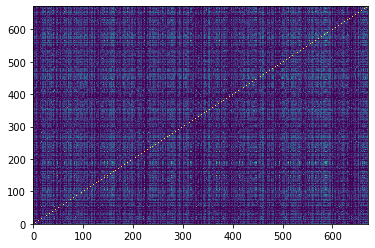

In [ ]:
plt.pcolor(similarity_df)
plt.show()

In [ ]:
user_id = 1
user_viewed_movies = merged[merged['userId'] == user_id]['original_title'].tolist()
print(f'=== user({user_id}) Movie List')
print(*user_viewed_movies, sep='\n')


similar_user_indexes = similarity_df.loc[user_id, :].sort_values(ascending=False).index.tolist()
most_similar_user_index = similar_user_indexes[1]
most_similar_user_viewed_movies = merged[merged['userId']==most_similar_user_index].original_title.values.tolist()

print()
print(f'=== Most Similar User({most_similar_user_index}) Movie List')
print(*most_similar_user_viewed_movies, sep='\n')

recommend = set(most_similar_user_viewed_movies) - set(user_viewed_movies) 

print()
print(f'=== Recommend Movie List')
print(*recommend, sep='\n')

=== user(1) Movie List
Rocky III
Greed
American Pie
My Tutor
Jay and Silent Bob Strike Back

=== Most Similar User(325) Movie List
Back to the Future
Underworld
Monsters, Inc.
The Great Dictator
Rocky III
My Tutor
Frankenstein Unbound

=== Recommend Movie List
Frankenstein Unbound
Underworld
Monsters, Inc.
The Great Dictator
Back to the Future


### 아이템 기반

대상 영화와 가장 가까운 영화를 구해서 추천한다. 영화를 본 사람들을 기준으로 한다.

입력 : 특정 영화

출력 : 영화

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(movie_user_matrix, movie_user_matrix)

similarity_df = pd.DataFrame(similarity)
print(similarity_df.head())

similarity_df.index = movie_user_matrix.index
similarity_df.columns = movie_user_matrix.index

print(similarity_df.head())

       0         1         2         3     ...      1510  1511      1512      1513
0  1.000000  0.278476  0.222003  0.293312  ...  0.055038   0.0  0.066045  0.059099
1  0.278476  1.000000  0.272645  0.293352  ...  0.000000   0.0  0.094317  0.137146
2  0.222003  0.272645  1.000000  0.289200  ...  0.000000   0.0  0.000000  0.075115
3  0.293312  0.293352  0.289200  1.000000  ...  0.000000   0.0  0.000000  0.070311
4  0.079558  0.187843  0.151322  0.094231  ...  0.000000   0.0  0.123351  0.183962

[5 rows x 1514 columns]
movieId    2         5         6       ...  108548    120637    134368
movieId                                ...                            
2        1.000000  0.278476  0.222003  ...     0.0  0.066045  0.059099
5        0.278476  1.000000  0.272645  ...     0.0  0.094317  0.137146
6        0.222003  0.272645  1.000000  ...     0.0  0.000000  0.075115
11       0.293312  0.293352  0.289200  ...     0.0  0.000000  0.070311
12       0.079558  0.187843  0.151322  ...     0.0 

In [ ]:
movie_id = title2id['Men in Black II']

similar_movie_indexes = similarity_df.loc[movie_id, :].sort_values(ascending=False).index.tolist()
similar_movie_indexes = similar_movie_indexes[1:]

recommend = [id2title[i] for i in similar_movie_indexes][:10]

print()
print(f'=== Recommend Movie List')
print(*recommend, sep='\n')


=== Recommend Movie List
Terminator 3: Rise of the Machines
The Talented Mr. Ripley
Point Break
The 39 Steps
Scarface
Солярис
Sleepless in Seattle
Arlington Road
The Million Dollar Hotel
Les Vacances de Monsieur Hulot


# by Deep Learning

## AutoEncoder-based Model

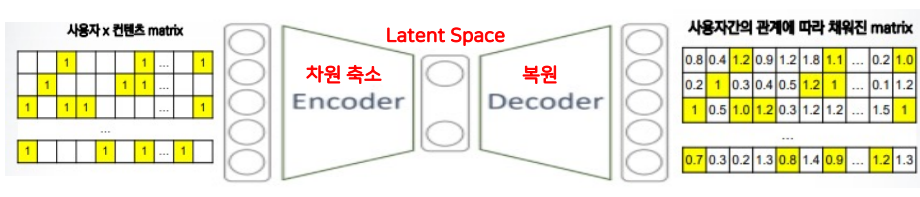

사용자가 매긴 평점을 바탕으로 AutoEncoder를 학습 시키고, 보지 않은(평점이 0인) 값을 생성해 낸다.
생성해 낸 평점 중 높은 평점의 영화를 추천한다.

입력 : 사용자 index

출력 : 추천 영화들

In [ ]:
x = user_movie_matrix.values

In [ ]:
x.shape

(671, 1514)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

In [ ]:
# 모형 구성
model = Sequential()
model.add(Input((x.shape[-1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(x.shape[-1]))
model.compile(optimizer='adam', loss='mse')


# 모형 학습
hist = model.fit(x, x, epochs=100, batch_size=256, validation_split=0.1)


Epoch 1/100
3/3 [==============================] - 1s 91ms/step - loss: 0.4165 - val_loss: 0.3477
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3803 - val_loss: 0.3174
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3456 - val_loss: 0.3001
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3321 - val_loss: 0.2962
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3262 - val_loss: 0.2924
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3203 - val_loss: 0.2895
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3170 - val_loss: 0.2866
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3128 - val_loss: 0.2832
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3077 - val_loss: 0.2797
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3020 - val_loss: 0.2758
Epoch 11/100
3/3 [=

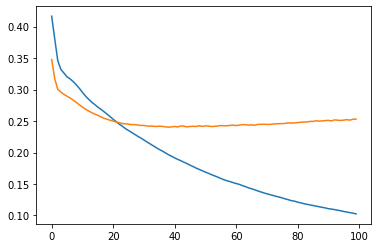

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
reconstructed = model.predict(x)


In [ ]:
reconstructed

array([[ 5.34816645e-03,  4.02054377e-02,  6.29608482e-02, ...,
         1.68316569e-02, -5.72888553e-03,  1.91175807e-02],
       [ 1.28278255e+00, -1.20212123e-01, -2.17237949e-01, ...,
        -4.31313962e-02, -1.06005669e-02,  2.01774351e-02],
       [-2.21912060e-02,  3.77951190e-04, -2.17499100e-02, ...,
        -4.13307250e-02,  1.17044151e-02,  2.77251936e-02],
       ...,
       [ 1.17754705e-01,  7.65083358e-04,  2.57340334e-02, ...,
        -4.56885993e-02,  1.39577389e-02, -8.49816203e-03],
       [-4.15617138e-01,  1.74463421e-01, -3.10288131e-01, ...,
        -2.54533142e-02,  5.53131849e-03, -3.38547193e-02],
       [ 5.43130159e-01,  5.41343510e-01, -1.88754618e-01, ...,
         1.02539599e-01, -6.12433255e-03,  2.01056540e-01]], dtype=float32)

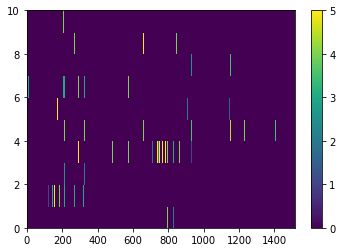

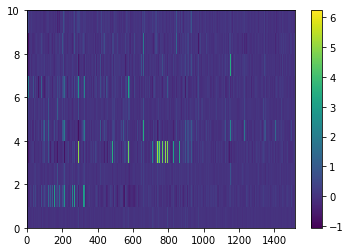

In [ ]:
plt.pcolor(x[:10])
plt.colorbar()
plt.show()
plt.pcolor(reconstructed[:10])
plt.colorbar()
plt.show()

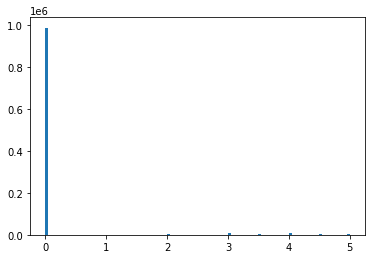

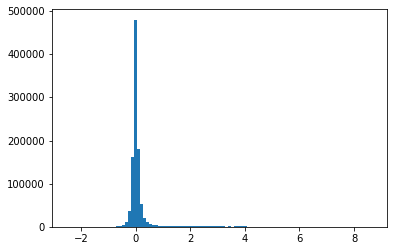

In [ ]:
plt.hist(x.flatten(), bins=100)
plt.show()
plt.hist(reconstructed.flatten(), bins=100)
plt.show()

In [ ]:
target_user_id = 1

user_record = user_movie_matrix.iloc[user_movie_matrix.index==target_user_id,:].values
print(user_record.shape)
print(user_record)

(1, 1514)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
reconstructed = model.predict(user_record)[0]
print(reconstructed.shape)
print(reconstructed)


(1514,)
[ 0.00534812  0.04020542  0.06296088 ...  0.01683166 -0.00572888
  0.01911757]


In [ ]:
user_viewed_movie_indexes = np.where(user_record[0]>0)[0]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

reconstructed_movie_indexes = user_movie_matrix.columns[np.argsort(reconstructed.squeeze())[::-1]]
print(reconstructed_movie_indexes)

5
[575 589 797 831 850]
Int64Index([2105, 1376, 1371,  260, 2294, 2762,  329, 3033,  541, 1918,
            ...
              22,  227,  586,  587, 4011,  163, 8873,  608,  628, 1089],
           dtype='int64', name='movieId', length=1514)


In [ ]:
recommed_movie_indexes = []
for i in reconstructed_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("recommended movies")
print(*recommended_movies[:10], sep="\n")

recommended movies
American Pie
Sweet Sixteen
Rocky III
The 39 Steps
Jay and Silent Bob Strike Back
Young and Innocent
Jurassic Park
Gods and Monsters
The Man with the Golden Arm
Or


## Softmax DNN

유저 id와 영화 id를 입력으로, 해당 rating을 출력으로 DNN을 학습. 이후 유저 id와 다른 영화 id를 입력으로 하여 rating을 예측하여 추천.

입력 : user id + movie id

출력 : rating

In [ ]:
features = np.transpose(user_movie_matrix.values.nonzero()).tolist()
features = np.array(features)
print(features.shape)
print(features[:10])

(30162, 2)
[[  0 575]
 [  0 589]
 [  0 797]
 [  0 831]
 [  0 850]
 [  1  19]
 [  1  53]
 [  1  70]
 [  1  75]
 [  1  77]]


In [ ]:
labels = []
for i, j in features:
    labels.append(int(user_movie_matrix.values[i,j]))
labels = np.array(labels)
print(labels.shape)
print(labels[:10])

(30162,)
[2 1 4 2 2 3 4 3 5 4]


In [ ]:
user_count, movie_count = user_movie_matrix.shape
print(user_count)
print(movie_count)

671
1514


In [ ]:
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(n_class, values):
    return np.eye(n_class)[values]
f1 = one_hot_encoding(user_count, features[:,0])
f2 = one_hot_encoding(movie_count, features[:,1])
print(f1.shape)
print(f2.shape)
x = np.concatenate([f1, f2], axis=1)
print(x.shape)
y = labels

(30162, 671)
(30162, 1514)
(30162, 2185)


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)

In [ ]:
print(train_x.shape)
print(test_x.shape)

(27145, 2185)
(3017, 2185)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras import Sequential

# 모형 구성
model = Sequential()
model.add(Input((x.shape[-1],)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

optimizer = tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# 모형 학습
hist = model.fit(train_x, train_y, epochs=200, batch_size=128, validation_split=0.1)


Epoch 1/200
191/191 [==============================] - 2s 5ms/step - loss: 8.4586 - mae: 2.6213 - val_loss: 1.3724 - val_mae: 0.9363
Epoch 2/200
191/191 [==============================] - 1s 4ms/step - loss: 0.9867 - mae: 0.7888 - val_loss: 1.8411 - val_mae: 1.0668
Epoch 3/200
191/191 [==============================] - 1s 4ms/step - loss: 0.4435 - mae: 0.5207 - val_loss: 1.2645 - val_mae: 0.8634
Epoch 4/200
191/191 [==============================] - 1s 4ms/step - loss: 0.3128 - mae: 0.4373 - val_loss: 1.0848 - val_mae: 0.8133
Epoch 5/200
191/191 [==============================] - 1s 4ms/step - loss: 0.2419 - mae: 0.3840 - val_loss: 1.1087 - val_mae: 0.8203
Epoch 6/200
191/191 [==============================] - 1s 4ms/step - loss: 0.2025 - mae: 0.3496 - val_loss: 1.1126 - val_mae: 0.8218
Epoch 7/200
191/191 [==============================] - 1s 4ms/step - loss: 0.1766 - mae: 0.3282 - val_loss: 1.0924 - val_mae: 0.8128
Epoch 8/200
191/191 [==============================] - 1s 4ms/step - 

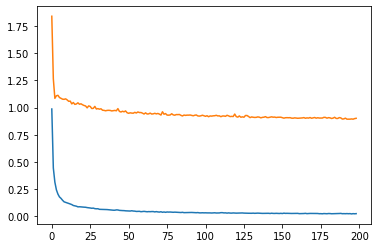

In [ ]:
plt.plot(hist.history['loss'][1:])
plt.plot(hist.history['val_loss'][1:])
plt.show()

In [ ]:
loss, mae = model.evaluate(test_x, test_y)
print("loss =",loss)
print("mae =",mae)

95/95 [==============================] - 0s 2ms/step - loss: 0.9031 - mae: 0.7301
loss = 0.9031252861022949
mae = 0.7301203012466431


0


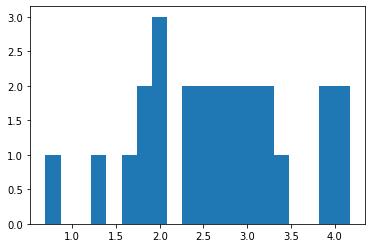

1


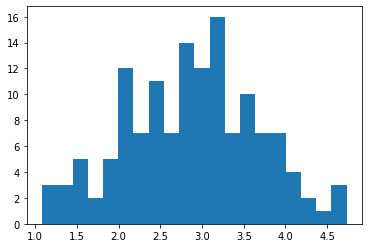

2


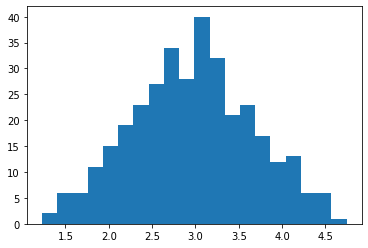

3


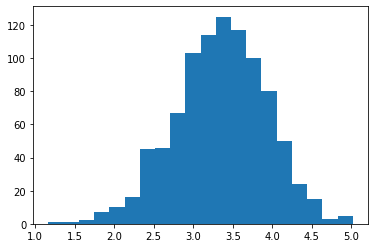

4


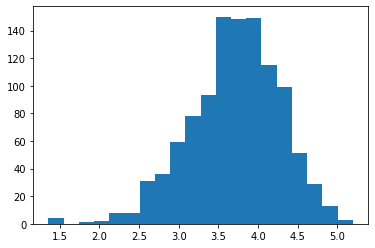

5


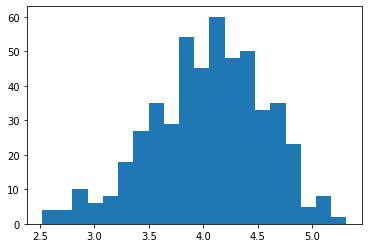

In [ ]:
y_ = model.predict(test_x)

for rating in range(6):
    print(rating)
    plt.hist(y_[np.where(test_y==rating)], bins=20)
    plt.show()

In [ ]:
user_id = 1
f1 = one_hot_encoding(user_count, [user_id]*movie_count)
f2 = one_hot_encoding(movie_count, np.arange(movie_count))

print(f1.shape)
print(f2.shape)

test_features = np.concatenate([f1, f2], axis=1)
print(test_features.shape)

(1514, 671)
(1514, 1514)
(1514, 2185)


In [ ]:
predicted = model.predict(test_features).squeeze()
print(predicted.shape)
print(predicted)

(1514,)
[3.0871694 2.9838042 4.177117  ... 3.6951828 3.5561137 3.71723  ]


In [ ]:
user_viewed_movie_indexes = np.where(user_movie_matrix.values[user_id]>0)[0]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

46
[ 19  53  70  75  77  83  87  90 105 124 125 127 134 147 152 156 158 159
 163 178 187 191 206 214 215 226 250 256 263 272 274 280 281 288 292 301
 302 303 321 322 323 324 325 326 341 363]


In [ ]:
predicted_movie_indexes = user_movie_matrix.columns[np.argsort(predicted.squeeze())[::-1]]
print(predicted_movie_indexes)

Int64Index([ 266,  150, 4973,  265,  592,  222,  585,  551, 2924, 5618,
            ...
            3574,   65,  829, 2383,  427, 1389,  405, 1499,  319,  223],
           dtype='int64', name='movieId', length=1514)


In [ ]:
recommed_movie_indexes = []
for i in predicted_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("recommended movies")
print(*recommended_movies[:10], sep="\n")

recommended movies
Le Mépris
48 Hrs.
Sous le Sable
Lili Marleen
The Conversation
Berlin: Die Sinfonie der Grosstadt
Monsters, Inc.
The Poseidon Adventure
Backdraft
Cousin, Cousine


## GMF, MLP-MF, NCF

In [ ]:
features = np.transpose(user_movie_matrix.values.nonzero()).tolist()
print(features[:10])
import random
random.shuffle(features)
print(features[:10])

[[0, 575], [0, 589], [0, 797], [0, 831], [0, 850], [1, 19], [1, 53], [1, 70], [1, 75], [1, 77]]
[[91, 146], [623, 182], [93, 1466], [212, 663], [62, 1153], [91, 163], [310, 437], [211, 302], [86, 408], [294, 260]]


In [ ]:
user_count, movie_count = user_movie_matrix.shape
print(user_count)
print(movie_count)

671
1514


In [ ]:
user_inputs = []
movie_inputs = []
labels = []
for u, m in features:

    # positive sampling
    user_inputs.append(u)
    movie_inputs.append(m)
    labels.append(int(True))

    # negative sampling
    j = np.random.randint(movie_count)
    while [u,j] in features:
        j = np.random.randint(movie_count)
    user_inputs.append(u)
    movie_inputs.append(j)
    labels.append(int(False))

user_inputs = np.array(user_inputs)
movie_inputs = np.array(movie_inputs)
labels = np.array(labels)
print(user_inputs.shape)
print(movie_inputs.shape)
print(labels.shape)
print(labels[:10])

(60324,)
(60324,)
(60324,)
[1 0 1 0 1 0 1 0 1 0]


In [ ]:
x = ( user_inputs, movie_inputs )
y = labels

### GMF



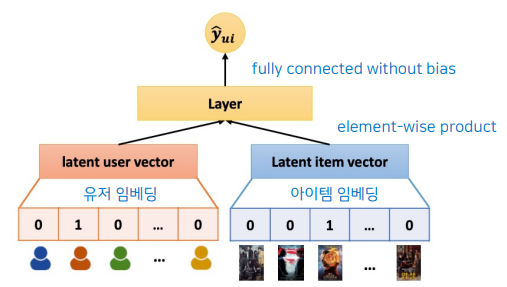

GMF 모델을 사용

user_id는 임베딩되어 user_lattent로 movie_id는 임베딩되어 movie_lattent로 변환된 후,
DNN의 입력으로 사용된다.

입력은 (user_id, movie_id), 출력은 rating.

특정 user에 대해 rating이 없는 영화들에 대한 rating을 구하고 이를 가지고 추천한다.

<br>

GMF 층만 사용하고 MLP 층은 사용하지 않는다.

<br>

입력 : 특정 유저 id

출력 : 추천하는 영화들

copy from https://dnddnjs.github.io/recomm/2019/08/15/neural_collaborative_filtering/

In [ ]:
def get_model(num_users, num_items, mf_dim=10, layers=[10], reg_layers=[0], reg_mf=0):
    assert len(layers) == len(reg_layers)
    num_layer = len(layers) #Number of layers in the MLP
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    from tensorflow.keras.regularizers import l2
    # Embedding layer
    MF_Embedding_User = Embedding(input_dim=num_users, output_dim=mf_dim, name='mf_embedding_user',
                                  embeddings_initializer='normal', embeddings_regularizer=l2(reg_mf), input_length=1)
    MF_Embedding_Item = Embedding(input_dim=num_items, output_dim=mf_dim, name='mf_embedding_item',
                                  embeddings_initializer='normal', embeddings_regularizer=l2(reg_mf), input_length=1)   

    # MLP_Embedding_User = Embedding(input_dim=num_users, output_dim=int(layers[0]/2), name="mlp_embedding_user",
    #                                embeddings_initializer='normal', embeddings_regularizer=l2(reg_layers[0]), input_length=1)
    # MLP_Embedding_Item = Embedding(input_dim=num_items, output_dim=int(layers[0]/2), name='mlp_embedding_item',
    #                                embeddings_initializer='normal', embeddings_regularizer=l2(reg_layers[0]), input_length=1)   
    
    # MF part
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    mf_vector = mf_user_latent * mf_item_latent

    # MLP part 
    # mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    # mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    # mlp_vector = Concatenate()([mlp_user_latent, mlp_item_latent])
    # for idx in range(1, num_layer):
    #     layer = Dense(layers[idx], W_regularizer= l2(reg_layers[idx]), activation='relu', name="layer%d" %idx)
    #     mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    # predict_vector = Concatenate()([mf_vector, mlp_vector])
    predict_vector = Concatenate()([mf_vector])

    # Final prediction layer
    prediction = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name="prediction")(predict_vector)
    
    model = tensorflow.keras.Model(inputs=[user_input, item_input], outputs=prediction)
    
    return model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras import Sequential

# 모형 구성
model = get_model(user_count, movie_count)

optimizer = tensorflow.keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# 모형 학습
hist = model.fit(x, y, epochs=100, batch_size=128, validation_split=0.1)


Epoch 1/100
425/425 [==============================] - 2s 3ms/step - loss: 0.6931 - acc: 0.5033 - val_loss: 0.6930 - val_acc: 0.5037
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 0.6913 - acc: 0.6261 - val_loss: 0.6887 - val_acc: 0.6352
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 0.6735 - acc: 0.7757 - val_loss: 0.6570 - val_acc: 0.7583
Epoch 4/100
425/425 [==============================] - 1s 3ms/step - loss: 0.6119 - acc: 0.7893 - val_loss: 0.5820 - val_acc: 0.7631
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 0.5227 - acc: 0.7906 - val_loss: 0.5153 - val_acc: 0.7708
Epoch 6/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4668 - acc: 0.7952 - val_loss: 0.4967 - val_acc: 0.7764
Epoch 7/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4502 - acc: 0.7980 - val_loss: 0.4950 - val_acc: 0.7784
Epoch 8/100
425/425 [==============================] - 1s 3ms/step - 

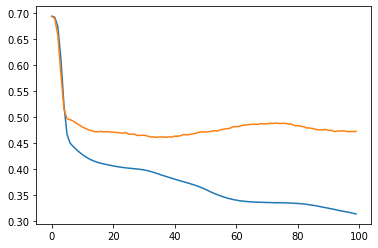

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
user_id = 2
f1 = np.array([user_id]*movie_count)
f2 = np.arange(movie_count)

print(f1.shape)
print(f2.shape)

test_features = [f1, f2]

(1514,)
(1514,)


In [ ]:
predicted = model.predict(test_features).squeeze()
print(predicted.shape)
print(predicted)

(1514,)
[0.88949525 0.9141225  0.9374185  ... 0.00819315 0.01362572 0.15837426]


In [ ]:
user_viewed_movie_indexes = user_movie_matrix.columns[np.where(user_movie_matrix.values[user_id]>0)]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

17
Int64Index([ 110,  247,  267,  296,  318,  377,  527,  592,  593,  595,  778,
             866, 1580, 1884, 2028, 2762, 2841],
           dtype='int64', name='movieId')


In [ ]:
predicted_movie_indexes = user_movie_matrix.columns[np.argsort(predicted.squeeze())[::-1]]
print(predicted_movie_indexes)

Int64Index([ 296,  608,  593,  318, 2762,  480,  110,  527, 1580,  377,
            ...
            2493, 2210, 4584, 1816, 7093, 2149, 2897,  756,  667,  600],
           dtype='int64', name='movieId', length=1514)


In [ ]:
recommed_movie_indexes = []
for i in predicted_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("=== recommended movies")
print(*recommended_movies[:10], sep="\n")

=== recommended movies
Men in Black II
Monsoon Wedding
Psycho
Big Fish
Rain Man
Fahrenheit 9/11
Bad Boys II
The 39 Steps
The Hours
Sleepless in Seattle


### MLP-based MF

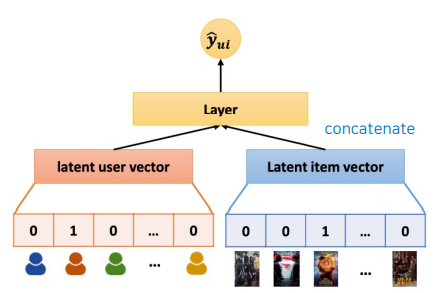

GMF 모델을 사용

user_id는 임베딩되어 user_lattent로 movie_id는 임베딩되어 movie_lattent로 변환된 후,
DNN의 입력으로 사용된다.

입력은 (user_id, movie_id), 출력은 rating.

특정 user에 대해 rating이 없는 영화들에 대한 rating을 구하고 이를 가지고 추천한다.

<br>

GMF 층은 사용하지 않고 MLP 층만 사용한다.

<br>

입력 : 특정 유저 id

출력 : 추천하는 영화들

copy from https://dnddnjs.github.io/recomm/2019/08/15/neural_collaborative_filtering/

In [ ]:
def get_model(num_users, num_items, mf_dim=10, layers=[10], reg_layers=[0], reg_mf=0):
    assert len(layers) == len(reg_layers)
    num_layer = len(layers) #Number of layers in the MLP
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    from tensorflow.keras.regularizers import l2
    # Embedding layer
    # MF_Embedding_User = Embedding(input_dim=num_users, output_dim=mf_dim, name='mf_embedding_user',
    #                               embeddings_initializer='normal', embeddings_regularizer=l2(reg_mf), input_length=1)
    # MF_Embedding_Item = Embedding(input_dim=num_items, output_dim=mf_dim, name='mf_embedding_item',
    #                               embeddings_initializer='normal', embeddings_regularizer=l2(reg_mf), input_length=1)   

    MLP_Embedding_User = Embedding(input_dim=num_users, output_dim=int(layers[0]/2), name="mlp_embedding_user",
                                   embeddings_initializer='normal', embeddings_regularizer=l2(reg_layers[0]), input_length=1)
    MLP_Embedding_Item = Embedding(input_dim=num_items, output_dim=int(layers[0]/2), name='mlp_embedding_item',
                                   embeddings_initializer='normal', embeddings_regularizer=l2(reg_layers[0]), input_length=1)   
    
    # MF part
    # mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    # mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    # mf_vector = mf_user_latent * mf_item_latent

    # MLP part 
    mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    mlp_vector = Concatenate()([mlp_user_latent, mlp_item_latent])
    for idx in range(1, num_layer):
        layer = Dense(layers[idx], W_regularizer= l2(reg_layers[idx]), activation='relu', name="layer%d" %idx)
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    # predict_vector = Concatenate()([mf_vector, mlp_vector])
    predict_vector = Concatenate()([mlp_vector])

    # Final prediction layer
    prediction = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name="prediction")(predict_vector)
    
    model = tensorflow.keras.Model(inputs=[user_input, item_input], outputs=prediction)
    
    return model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras import Sequential

# 모형 구성
model = get_model(user_count, movie_count)

optimizer = tensorflow.keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# 모형 학습
hist = model.fit(x, y, epochs=100, batch_size=128, validation_split=0.1)


Epoch 1/100
425/425 [==============================] - 2s 3ms/step - loss: 0.6631 - acc: 0.6969 - val_loss: 0.6228 - val_acc: 0.7713
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 0.5670 - acc: 0.7834 - val_loss: 0.5310 - val_acc: 0.7782
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4857 - acc: 0.7896 - val_loss: 0.4863 - val_acc: 0.7832
Epoch 4/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4540 - acc: 0.7941 - val_loss: 0.4797 - val_acc: 0.7845
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4454 - acc: 0.7990 - val_loss: 0.4770 - val_acc: 0.7857
Epoch 6/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4407 - acc: 0.8027 - val_loss: 0.4749 - val_acc: 0.7840
Epoch 7/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4377 - acc: 0.8049 - val_loss: 0.4730 - val_acc: 0.7844
Epoch 8/100
425/425 [==============================] - 1s 3ms/step - 

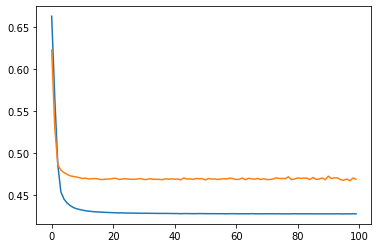

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
user_id = 2
f1 = np.array([user_id]*movie_count)
f2 = np.arange(movie_count)

print(f1.shape)
print(f2.shape)

test_features = [f1, f2]

(1514,)
(1514,)


In [ ]:
predicted = model.predict(test_features).squeeze()
print(predicted.shape)
print(predicted)

(1514,)
[0.85213155 0.7727993  0.8491628  ... 0.02668412 0.03712484 0.08188497]


In [ ]:
user_viewed_movie_indexes = user_movie_matrix.columns[np.where(user_movie_matrix.values[user_id]>0)]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

17
Int64Index([ 110,  247,  267,  296,  318,  377,  527,  592,  593,  595,  778,
             866, 1580, 1884, 2028, 2762, 2841],
           dtype='int64', name='movieId')


In [ ]:
predicted_movie_indexes = user_movie_matrix.columns[np.argsort(predicted.squeeze())[::-1]]
print(predicted_movie_indexes)

Int64Index([  296,   608,   593,   260,   110,   318,   380,   527,   480,
              377,
            ...
             8583, 41714,  1891,  3870,  2897,  6114, 49225,  2212,  6522,
             2056],
           dtype='int64', name='movieId', length=1514)


In [ ]:
recommed_movie_indexes = []
for i in predicted_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("=== recommended movies")
print(*recommended_movies[:10], sep="\n")

=== recommended movies
Men in Black II
The 39 Steps
Rain Man
Monsoon Wedding
Sleepless in Seattle
La passion de Jeanne d'Arc
Lost in Translation
The Hours
Big Fish
Halbe Treppe


### NCF

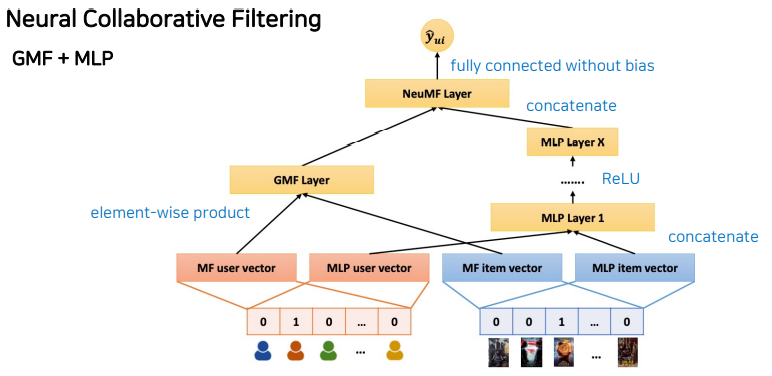

GMF 모델을 사용

user_id는 임베딩되어 user_lattent로 movie_id는 임베딩되어 movie_lattent로 변환된 후,
DNN의 입력으로 사용된다.

입력은 (user_id, movie_id), 출력은 rating.

특정 user에 대해 rating이 없는 영화들에 대한 rating을 구하고 이를 가지고 추천한다.

<br>

GMF 층과 MLP 층 모두 사용한다.

<br>

입력 : 특정 유저 id

출력 : 추천하는 영화들

copy from https://dnddnjs.github.io/recomm/2019/08/15/neural_collaborative_filtering/

In [ ]:
def get_model(num_users, num_items, mf_dim=10, layers=[10], reg_layers=[0], reg_mf=0):
    assert len(layers) == len(reg_layers)
    num_layer = len(layers) #Number of layers in the MLP
    # Input variables
    user_input = Input(shape=(1,), dtype='int32', name = 'user_input')
    item_input = Input(shape=(1,), dtype='int32', name = 'item_input')

    from tensorflow.keras.regularizers import l2
    # Embedding layer
    MF_Embedding_User = Embedding(input_dim=num_users, output_dim=mf_dim, name='mf_embedding_user',
                                  embeddings_initializer='normal', embeddings_regularizer=l2(reg_mf), input_length=1)
    MF_Embedding_Item = Embedding(input_dim=num_items, output_dim=mf_dim, name='mf_embedding_item',
                                  embeddings_initializer='normal', embeddings_regularizer=l2(reg_mf), input_length=1)   

    MLP_Embedding_User = Embedding(input_dim=num_users, output_dim=int(layers[0]/2), name="mlp_embedding_user",
                                   embeddings_initializer='normal', embeddings_regularizer=l2(reg_layers[0]), input_length=1)
    MLP_Embedding_Item = Embedding(input_dim=num_items, output_dim=int(layers[0]/2), name='mlp_embedding_item',
                                   embeddings_initializer='normal', embeddings_regularizer=l2(reg_layers[0]), input_length=1)   
    
    # MF part
    mf_user_latent = Flatten()(MF_Embedding_User(user_input))
    mf_item_latent = Flatten()(MF_Embedding_Item(item_input))
    mf_vector = mf_user_latent * mf_item_latent

    # MLP part 
    mlp_user_latent = Flatten()(MLP_Embedding_User(user_input))
    mlp_item_latent = Flatten()(MLP_Embedding_Item(item_input))
    mlp_vector = Concatenate()([mlp_user_latent, mlp_item_latent])
    for idx in range(1, num_layer):
        layer = Dense(layers[idx], W_regularizer= l2(reg_layers[idx]), activation='relu', name="layer%d" %idx)
        mlp_vector = layer(mlp_vector)

    # Concatenate MF and MLP parts
    predict_vector = Concatenate()([mf_vector, mlp_vector])

    # Final prediction layer
    prediction = Dense(1, activation='sigmoid', kernel_initializer='lecun_uniform', name="prediction")(predict_vector)
    
    model = tensorflow.keras.Model(inputs=[user_input, item_input], outputs=prediction)
    
    return model


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras import Sequential

# 모형 구성
model = get_model(user_count, movie_count)

optimizer = tensorflow.keras.optimizers.RMSprop(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

# 모형 학습
hist = model.fit(x, y, epochs=100, batch_size=128, validation_split=0.1)


Epoch 1/100
425/425 [==============================] - 2s 4ms/step - loss: 0.6640 - acc: 0.6896 - val_loss: 0.6239 - val_acc: 0.7666
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 0.5668 - acc: 0.7872 - val_loss: 0.5303 - val_acc: 0.7766
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4828 - acc: 0.7921 - val_loss: 0.4847 - val_acc: 0.7824
Epoch 4/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4496 - acc: 0.7970 - val_loss: 0.4777 - val_acc: 0.7853
Epoch 5/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4381 - acc: 0.8028 - val_loss: 0.4737 - val_acc: 0.7850
Epoch 6/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4288 - acc: 0.8074 - val_loss: 0.4699 - val_acc: 0.7860
Epoch 7/100
425/425 [==============================] - 1s 3ms/step - loss: 0.4196 - acc: 0.8116 - val_loss: 0.4658 - val_acc: 0.7863
Epoch 8/100
425/425 [==============================] - 1s 3ms/step - 

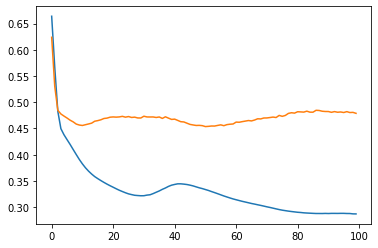

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
user_id = 2
f1 = np.array([user_id]*movie_count)
f2 = np.arange(movie_count)

print(f1.shape)
print(f2.shape)

test_features = [f1, f2]

(1514,)
(1514,)


In [ ]:
predicted = model.predict(test_features).squeeze()
print(predicted.shape)
print(predicted)

(1514,)
[0.97249687 0.9131077  0.98594034 ... 0.00319904 0.00171587 0.00600986]


In [ ]:
user_viewed_movie_indexes = user_movie_matrix.columns[np.where(user_movie_matrix.values[user_id]>0)]
print(len(user_viewed_movie_indexes))
print(user_viewed_movie_indexes)

17
Int64Index([ 110,  247,  267,  296,  318,  377,  527,  592,  593,  595,  778,
             866, 1580, 1884, 2028, 2762, 2841],
           dtype='int64', name='movieId')


In [ ]:
predicted_movie_indexes = user_movie_matrix.columns[np.argsort(predicted.squeeze())[::-1]]
print(predicted_movie_indexes)

Int64Index([  296,   608,   593,   527,   260,   110,   380,   318,   480,
              377,
            ...
            26180,   638, 41714,   408,  4104, 55687,  4961, 47714,  5521,
             8583],
           dtype='int64', name='movieId', length=1514)


In [ ]:
recommed_movie_indexes = []
for i in predicted_movie_indexes:
    if i in user_viewed_movie_indexes : continue
    recommed_movie_indexes.append(i)

recommended_movies = [id2title[i] for i in recommed_movie_indexes]

print("=== recommended movies")
print(*recommended_movies[:10], sep="\n")

=== recommended movies
Men in Black II
The 39 Steps
Rain Man
Monsoon Wedding
La belle et la bête
La passion de Jeanne d'Arc
Big Fish
The Hours
Sleepless in Seattle
Lost in Translation


# TensorFlow Recommendations

## Retrieval

from https://www.tensorflow.org/recommenders/examples/basic_retrieval

In [ ]:
!pip install -q tensorflow-recommenders
!pip install -q --upgrade tensorflow-datasets

In [ ]:
import tensorflow_recommenders as tfrs
import tensorflow as tf

from typing import Dict, Text
import pprint

In [ ]:
merged

,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,1,1405,1.0,1260759203,Greed
2,1,2105,4.0,1260759139,American Pie
3,1,2193,2.0,1260759198,My Tutor
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back
...,...,...,...,...,...
30157,671,4973,4.5,1064245471,Sous le Sable
30158,671,4993,5.0,1064245483,5 Card Stud
30159,671,4995,4.0,1064891537,Boogie Nights
30160,671,5902,3.5,1064245507,A Bridge Too Far


In [ ]:
user_item_df = pd.DataFrame()
user_item_df[['user_id', 'item_id']] = merged[['userId', 'movieId']].astype(str)
user_item_df['quantity'] = merged['rating']

item_df = pd.DataFrame()
item_df['item_id'] = meta['movieId'].astype(str)

In [ ]:
user_item_ds = tf.data.Dataset.from_tensor_slices(
    {name: np.array(value) for name, value in user_item_df.items()}
    )

items_ds = tf.data.Dataset.from_tensor_slices(
    {name: np.array(value) for name, value in item_df.items()}
)

In [ ]:
user_item_dic = user_item_ds.map(lambda x: {
    'user_id' : x['user_id'], 
    'item_id' : x['item_id'], 
    'quantity' : float(x['quantity']),
})

items = items_ds.map(lambda x: x['item_id'])

In [ ]:
for x in user_item_dic.take(5).as_numpy_iterator():
    print(x)
for x in items.take(5).as_numpy_iterator():
    print(x)  

{'user_id': b'1', 'item_id': b'1371', 'quantity': 2.5}
{'user_id': b'1', 'item_id': b'1405', 'quantity': 1.0}
{'user_id': b'1', 'item_id': b'2105', 'quantity': 4.0}
{'user_id': b'1', 'item_id': b'2193', 'quantity': 2.0}
{'user_id': b'1', 'item_id': b'2294', 'quantity': 2.0}
b'862'
b'8844'
b'15602'
b'31357'
b'11862'


In [ ]:
unique_user_ids = np.unique(np.concatenate(list(user_item_ds.batch(1_000).map(lambda x: x["user_id"]))))
unique_item_ids = np.unique(np.concatenate(list(items_ds.batch(1_000).map(lambda x: x["item_id"]))))

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup, IntegerLookup

user_id_vocabulary = StringLookup(vocabulary=unique_user_ids)
item_id_vocabulary = StringLookup(vocabulary=unique_item_ids)

In [ ]:
print(user_id_vocabulary.get_vocabulary()[:10])
print(item_id_vocabulary.get_vocabulary()[:10])

['[UNK]', '1', '10', '100', '101', '102', '103', '104', '105', '106']
['[UNK]', '100', '10001', '10002', '10003', '10009', '10012', '10013', '10014', '10015']


In [ ]:
class UserItemModel(tfrs.Model):

  def __init__(
      self,
      user_model: tf.keras.Model,
      item_model: tf.keras.Model,
      task: tfrs.tasks.Retrieval):
    super().__init__()

    self.user_model = user_model
    self.item_model = item_model
    self.task = task

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    user_embeddings = self.user_model(features["user_id"])
    item_embeddings = self.item_model(features["item_id"])
    return self.task(user_embeddings, item_embeddings)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding

EMBEDDING_SIZE = 64

user_model = Sequential([
                         user_id_vocabulary,
                         Embedding(user_id_vocabulary.vocabulary_size(), EMBEDDING_SIZE)
                         ])
item_model = Sequential([
                         item_id_vocabulary,
                         Embedding(item_id_vocabulary.vocabulary_size(), EMBEDDING_SIZE)
                         ])

task = tfrs.tasks.Retrieval(
    metrics=tfrs.metrics.FactorizedTopK(candidates=items.batch(128).map(item_model))
)


model = UserItemModel(user_model, item_model, task)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.5))


In [ ]:
all_data_count = len(user_item_ds)
print(all_data_count)
train_count = int(all_data_count*0.9)
print(train_count)

30162
27145


In [ ]:
tf.random.set_seed(42)
shuffled = user_item_ds.shuffle(all_data_count, seed=42, reshuffle_each_iteration=False)

train_ds = shuffled.take(train_count)
test_ds = shuffled.skip(train_count).take(all_data_count - train_count)

In [ ]:
hist = model.fit(train_ds.batch(4096), epochs=10)

Epoch 1/10
7/7 [==============================] - 5s 727ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0074 - factorized_top_k/top_5_categorical_accuracy: 0.0655 - factorized_top_k/top_10_categorical_accuracy: 0.1369 - factorized_top_k/top_50_categorical_accuracy: 0.4648 - factorized_top_k/top_100_categorical_accuracy: 0.6337 - loss: 26456.9863 - regularization_loss: 0.0000e+00 - total_loss: 26456.9863
Epoch 2/10
7/7 [==============================] - 5s 720ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0036 - factorized_top_k/top_5_categorical_accuracy: 0.0429 - factorized_top_k/top_10_categorical_accuracy: 0.1133 - factorized_top_k/top_50_categorical_accuracy: 0.4733 - factorized_top_k/top_100_categorical_accuracy: 0.6539 - loss: 26336.2407 - regularization_loss: 0.0000e+00 - total_loss: 26336.2407
Epoch 3/10
7/7 [==============================] - 5s 731ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0048 - factorized_top_k/top_5_categorical_accuracy: 0.0

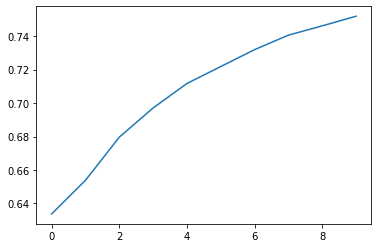

In [ ]:
plt.plot(hist.history["factorized_top_k/top_100_categorical_accuracy"])
plt.show()

In [ ]:
from tensorflow_recommenders.layers.factorized_top_k import BruteForce

retriever = BruteForce(model.user_model).index_from_dataset(
  tf.data.Dataset.zip((items.batch(100), items.batch(100).map(model.item_model)))
)

In [ ]:
target_user_id = str(2)

_, recommended_item_ids = retriever(np.array([target_user_id]))
recommended_item_ids = np.array(recommended_item_ids).flatten()
recommended_movies = meta.loc[meta.movieId.isin(recommended_item_ids), 'original_title'].values
print("=== recommended movies")
print(*recommended_movies, sep='\n')

=== recommended movies
Primal Fear
Rebecca
Der Himmel über Berlin
8½
Night on Earth
Absolute Power
The Horse Whisperer
Notting Hill
The Last Samurai
La strada
